In [1]:
import pandas as pd

In [2]:
!gdown 1fia4-oT84O_mq6zOlh6vu-doa7MV__fb

Downloading...
From: https://drive.google.com/uc?id=1fia4-oT84O_mq6zOlh6vu-doa7MV__fb
To: /content/power_consumption_g3_feat.csv
100% 2.33M/2.33M [00:00<00:00, 95.9MB/s]


In [3]:
!gdown 14l1C-KLIh9REfXDF_-YisA4YKgl404e1

Downloading...
From: https://drive.google.com/uc?id=14l1C-KLIh9REfXDF_-YisA4YKgl404e1
To: /content/power_consumption_g3.csv
100% 1.44M/1.44M [00:00<00:00, 143MB/s]


In [4]:
data1 = pd.read_csv("power_consumption_g3_feat.csv")

In [5]:
data2 = pd.read_csv("power_consumption_g3.csv")

In [6]:
data1 = data1.rename(columns = {'Datetime' : 'Date'})

In [7]:
data2 = data2.rename(columns = {'Datetime' : 'Date'})

In [8]:
data1.head(3)

,Date,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100


In [9]:
data1.Date = pd.to_datetime(data1.Date)
data1 = data1.set_index('Date')
data1 = data1.sort_index()
data1.head(3)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Date,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100


In [10]:
data2.Date = pd.to_datetime(data2.Date)
data2 = data2.set_index('Date')
data2 = data2.sort_index()
data2.head(3)

,SolarPower
Date,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127


In [11]:
data1 = data1.groupby(pd.Grouper(freq='120min')).sum()

In [12]:
data2 = data2.groupby(pd.Grouper(freq='120min')).sum()

In [13]:
data = pd.merge(data1, data2, left_index=True, right_index=True)

In [14]:
data.head(3)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,70.474,915.9,0.983,0.722,1.268,323131.13924
2017-01-01 02:00:00,60.352,936.1,0.991,0.737,1.621,257365.06328
2017-01-01 04:00:00,59.036,895.7,0.980,0.743,1.450,247698.22784


In [15]:
data.isna().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

In [16]:
columns = data.columns

In [17]:
for i in range(1, 5):
  for col in columns:
    data[f'{col}_prev_{i}'] = data[col].shift(i, axis=0)

In [18]:
data.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'SolarPower', 'Temperature_prev_1', 'Humidity_prev_1',
       'WindSpeed_prev_1', 'GeneralDiffuseFlows_prev_1', 'DiffuseFlows_prev_1',
       'SolarPower_prev_1', 'Temperature_prev_2', 'Humidity_prev_2',
       'WindSpeed_prev_2', 'GeneralDiffuseFlows_prev_2', 'DiffuseFlows_prev_2',
       'SolarPower_prev_2', 'Temperature_prev_3', 'Humidity_prev_3',
       'WindSpeed_prev_3', 'GeneralDiffuseFlows_prev_3', 'DiffuseFlows_prev_3',
       'SolarPower_prev_3', 'Temperature_prev_4', 'Humidity_prev_4',
       'WindSpeed_prev_4', 'GeneralDiffuseFlows_prev_4', 'DiffuseFlows_prev_4',
       'SolarPower_prev_4'],
      dtype='object')

In [19]:
data = data.drop(columns = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows'])

In [20]:
data.columns

Index(['SolarPower', 'Temperature_prev_1', 'Humidity_prev_1',
       'WindSpeed_prev_1', 'GeneralDiffuseFlows_prev_1', 'DiffuseFlows_prev_1',
       'SolarPower_prev_1', 'Temperature_prev_2', 'Humidity_prev_2',
       'WindSpeed_prev_2', 'GeneralDiffuseFlows_prev_2', 'DiffuseFlows_prev_2',
       'SolarPower_prev_2', 'Temperature_prev_3', 'Humidity_prev_3',
       'WindSpeed_prev_3', 'GeneralDiffuseFlows_prev_3', 'DiffuseFlows_prev_3',
       'SolarPower_prev_3', 'Temperature_prev_4', 'Humidity_prev_4',
       'WindSpeed_prev_4', 'GeneralDiffuseFlows_prev_4', 'DiffuseFlows_prev_4',
       'SolarPower_prev_4'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [22]:
X, Y = data.drop(columns="SolarPower", axis=1), data.SolarPower

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [24]:
params = {
    "n_estimators": np.arange(50, 200, 100),
    "max_depth": [3, 5, 7]
}

In [25]:
grid_search = GridSearchCV(XGBRegressor(), cv=TimeSeriesSplit(5), param_grid=params)

In [26]:
grid_search.fit(X, Y, verbose=2)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': array([ 50, 150])})

In [27]:
estimator = grid_search.best_estimator_

In [28]:
estimator.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
preds = estimator.predict(X_test)

In [30]:
mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(519300458.9543582, 16963.713636332952, 0.8911589212843587)

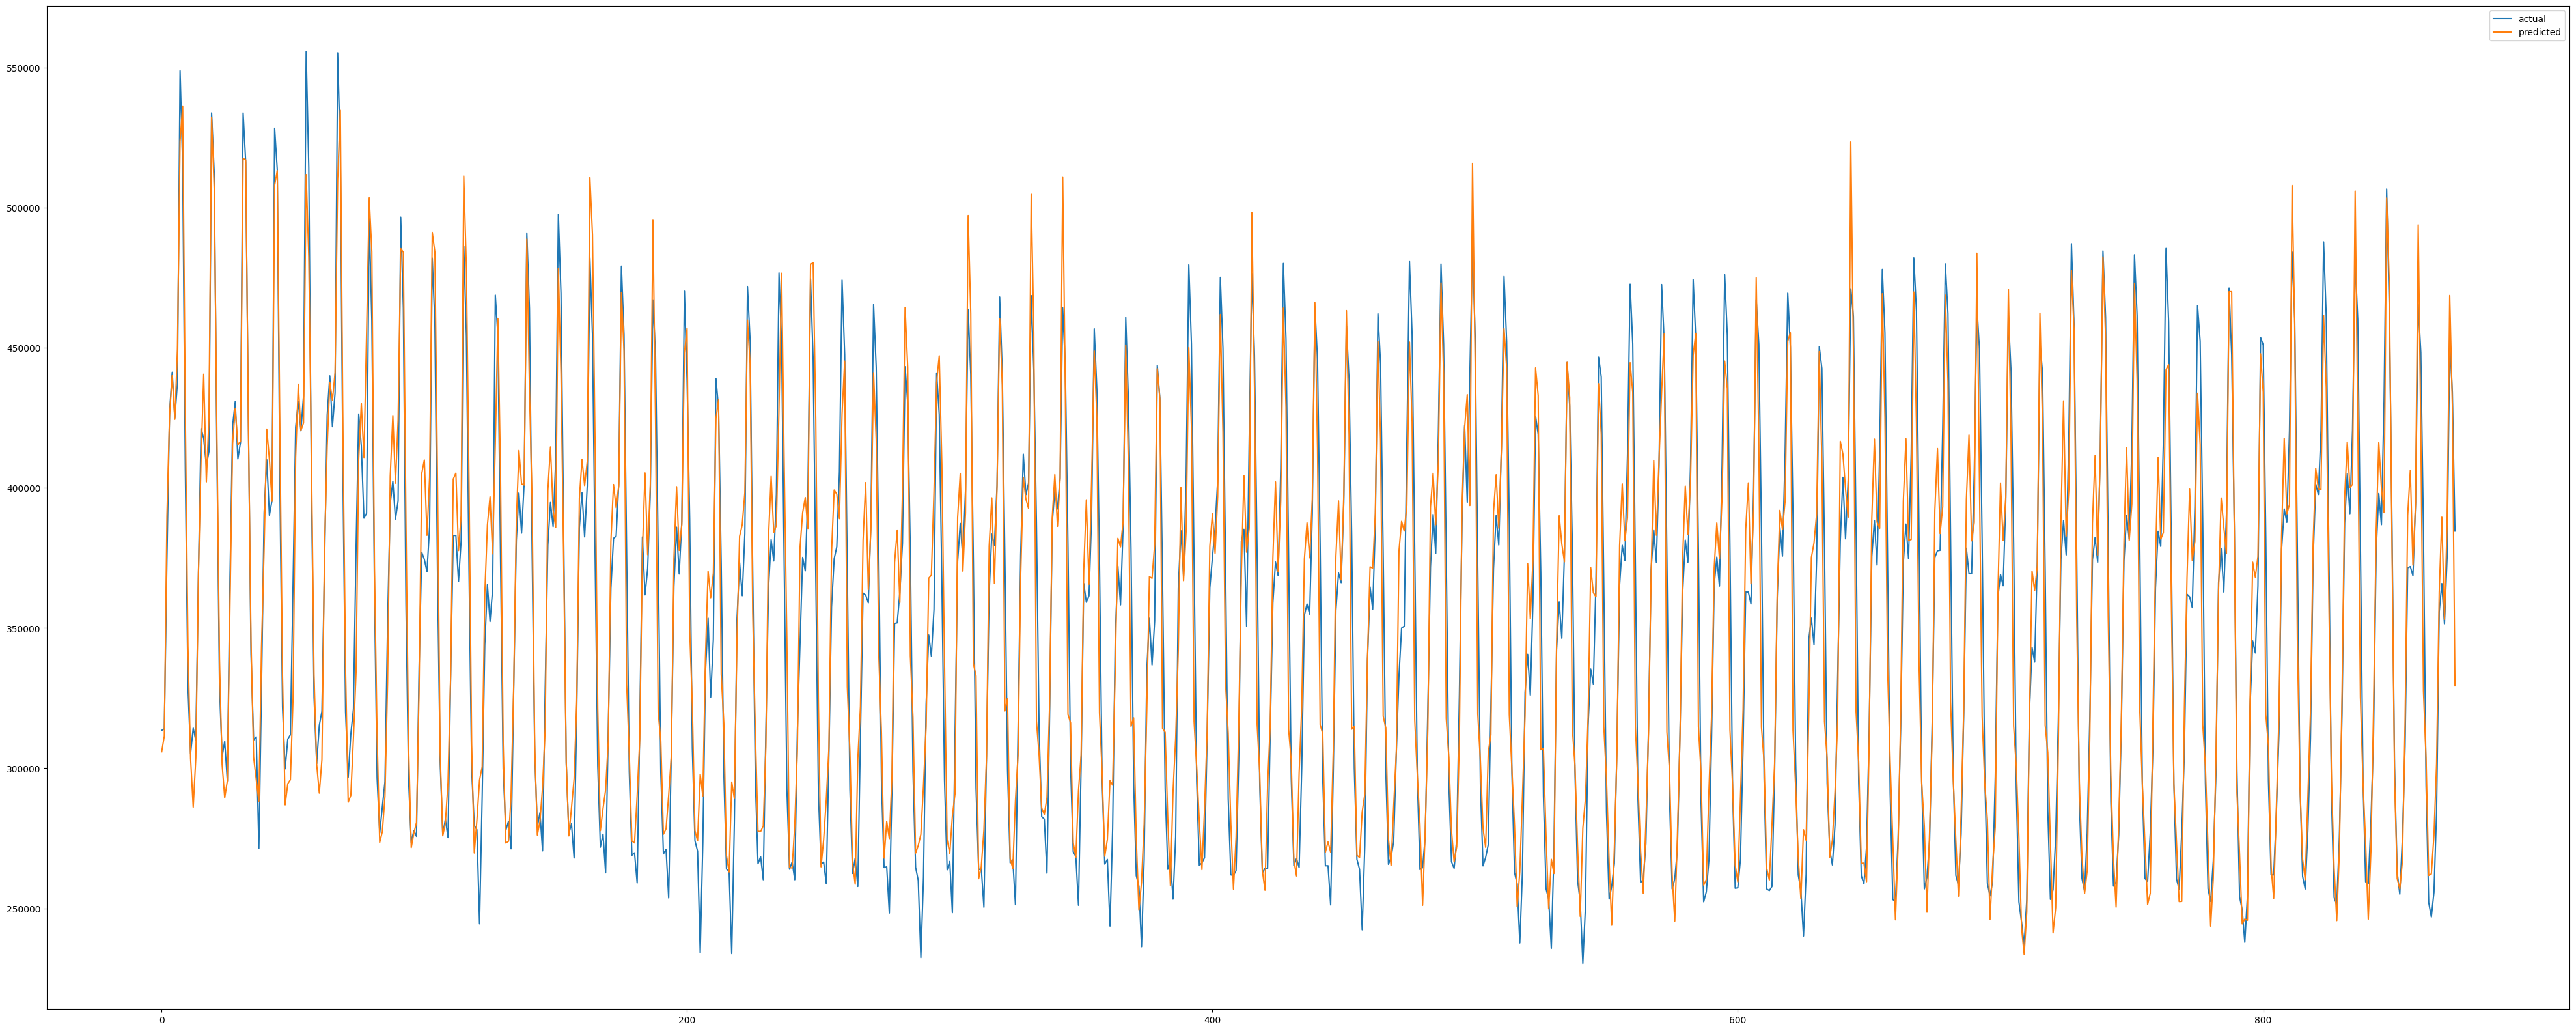

In [35]:
plt.figure(figsize=(50, 20))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()